# Part 1: Gold Bug

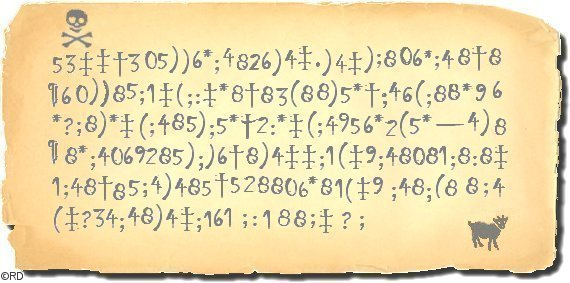

### Using kmers and Python against the Gold Bug problem

This is a little Jupyter notebook to play around with the Gold Bug encoding problem. You'll look at 
hands-on solutions in the in-class, but it's also fun to play around a little with Python and
the kmer analysis code you've written before to solve the same problem.

#### The Gold Bug encoding

Here's the string of characters used in Poe's secret 'Gold Bug' message:

In [3]:
# This is a multi-line string (starts and ends with triple quotes); it makes it easier to see
# the full layout of a text block in your notebook

gold_bug_message = """
53‡‡†305))6*;4826)4‡.)4‡);80
6*;48†8¶60))85;1‡(;:‡*8†83(88)
5*†;46(;88*96*?;8)*‡(;485);5*†
2:*‡(;4956*2(5*-4)8¶8*;40692
85);)6†8)4‡‡;1(‡9;48081;8:8‡1
;48†85;4)485†528806*81(‡9;48
;(88;4(‡?34;48)4‡;161;:188;‡?;
""".replace('\n','') #  we also remove any endline characters with the replace command

In [65]:
# we can now print the message and check that it matches what we intended
print(gold_bug_message)

53‡‡†305))6*;4826)4‡.)4‡);806*;48†8¶60))85;1‡(;:‡*8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*2(5*-4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;48†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:188;‡?;


### Reference kmer implementation

There are a couple of ways to implement the kmer finding fuction. Below is one way 
we can approach this:

In [72]:
def find_most_abundant_kmers(text, k, min_count):
    from collections import Counter

    # Ensure k is a valid size
    if k <= 0 or k > len(text):
        return "Invalid k size"

    # Generate all k-mers from the text
    kmers = [text[i:i+k] for i in range(len(text) - k + 1)]

    # Count occurrences of each k-mer
    kmer_counts = Counter(kmers)

    # Extract k-mers that are most abundant
    most_abundant_kmers = {kmer: count for kmer, count in kmer_counts.items() if count >= min_count}

    return {k:v for k, v in sorted(most_abundant_kmers.items(), key=lambda item: item[1])}


### Using Kmers to help decoding

Let's try out some kmer-based approaches to decode the Gold Bug message below. Some things you should
consider include:

- What role does the kmer length play?
- Should you try multiple lengths? Why or why not?
- What role does the threshold play?

In [77]:
# for instance: 
# find_most_abundant_kmers(gold_bug_message,5,2)

# Part 2: Encoding messages using Python code

These simple character substiution approaches are pretty easy to implement in Python. Lets walk through a simple example of how you could use Python to create a hidden message

In [68]:
# our example text to encode.

text_to_encode = """
The quick brown fox jumps over the lazy dog is an English-language pangram. It is also very hard to decode
""".replace('\n','')

In [69]:
from random import shuffle
import string

# uncomment the print line below to see all 'printable' ASCII characters in python. 
# We'll only use the first 80 to avoid some of the weirder ones
# print(string.printable)
used_characters = list(string.printable[0:80])


# make a shuffled list. One weird thing in python is that some functions return the result
# and other functions (like shuffle) change the object you call them with. In this case, we need
# to copy the 'used_characters' variable first into a new variable shuffled_characters, 
# and then shuffle it. 
shuffled_characters = list(string.printable[0:80])
shuffle(shuffled_characters)

# this is what is called a dictionary comprehension in python. There's a lot to break down here.
# from right to left:
# - we call 'zip', this takes two lists and returns a two tuple (value_1_list_a, value_1_list_b) for each pair of values in the lists
# - we then make a dictionary entry for each key (k) and value (v) using the syntax 'k: v for (k,v)'
# - lastly by surrounding the statements in curly brackets we're telling python to make a dictionary from the results
#
# the character_mapping dictionary will now contain our encoding scheme, substituting one letter for another. What
# differences are there here from the gold bug encoding?
character_mapping = {k: v for (k,v) in zip(used_characters,shuffled_characters)}

# if you want to see the results of shuffling the characters uncomment the line below
# print(character_mapping)

In [70]:
encoded_message = "".join([character_mapping[x] for x in text_to_encode.replace(' ','')])

print(encoded_message)

#b.hY;&a!qWmy:WLXY%9rWC.q)b.uRe/1Wj;rRysyju;rbPuRyjYRj.9RyjqR%AI);rRurWC.q/bRq1)W1.&W1.


### Decoding it

Try out using the kmer approach above to decode this encoding. What makes it really challenging? What other approaches could you use?